In [1]:
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score , confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [2]:
name = ['sentiment' , 'ids' , 'date', 'flag' , 'user' , 'text']
df = pd.read_csv("Dataset/twitter.csv" , names= name)
df.sample(5)

,sentiment,ids,date,flag,user,text
1005826,4,1880551021,Fri May 22 01:38:49 PDT 2009,NO_QUERY,bertorosales,friday night. time for some mac and cheese and...
100684,0,1794091114,Thu May 14 04:55:58 PDT 2009,NO_QUERY,ziil93,i lied to someone today i'm so sorry! my cons...
230034,0,1978644040,Sun May 31 00:00:16 PDT 2009,NO_QUERY,xDirtyBurdx,@PrincessKaulitz XD....I died laugh when I saw...
941510,4,1794234720,Thu May 14 05:19:05 PDT 2009,NO_QUERY,lightgood,"@JaxLicurse Cute kid, urz?"
1135445,4,1976489235,Sat May 30 17:28:12 PDT 2009,NO_QUERY,Spiffydude,Likes lying in bed with his fiance


In [3]:
df.info()
df.replace({'sentiment' : {4:1}} , inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


sentiment
0    800000
1    800000
Name: count, dtype: int64

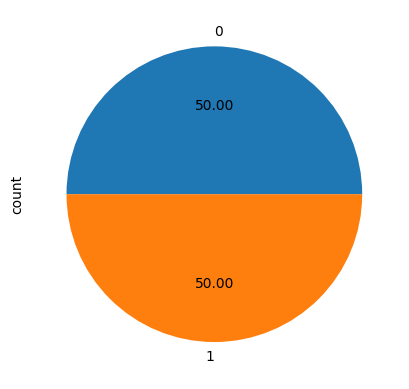

In [4]:
df['sentiment'].value_counts().plot(kind = "pie" , autopct = '%.2f' )
df['sentiment'].value_counts()

In [5]:
df.isnull().sum()


sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

In [6]:
        # Preprocssing of text data

df['text'] = df['text'].str.lower() # convert into lower-case

In [7]:
exclude = string.punctuation # Remove punctuation
def remove_pun(text):
    return text.translate(str.maketrans("" , '' , exclude))

df['text'] = df['text'].apply(remove_pun)

df['text'].iloc[:3]
    

0    switchfoot httptwitpiccom2y1zl  awww thats a b...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
Name: text, dtype: object

In [8]:
def remove_html_tag(text):       # remove HTML tags
    pattern = re.compile("<.?>")
    return pattern.sub(r'' , text)

df['text'] = df['text'].apply(remove_html_tag)

df['text'].iloc[:3]

0    switchfoot httptwitpiccom2y1zl  awww thats a b...
1    is upset that he cant update his facebook by t...
2    kenichan i dived many times for the ball manag...
Name: text, dtype: object

In [9]:
stop_words = set(stopwords.words('english'))  # Remove Stop Words

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word not in stop_words]
    return " ".join(filtered_words[:])

df['text'] = df['text'].apply(remove_stopwords)

df['text'].iloc[:3]


0    switchfoot httptwitpiccom2y1zl awww thats bumm...
1    upset cant update facebook texting might cry r...
2    kenichan dived many times ball managed save 50...
Name: text, dtype: object

In [10]:
ps = PorterStemmer()  # Convert each word into it's root word

def stem(text):
    return " ".join([ps.stem(word) for word in text.split()])

df['text'] = df['text'].apply(stem)

df['text'].iloc[:3]

0    switchfoot httptwitpiccom2y1zl awww that bumme...
1    upset cant updat facebook text might cri resul...
2    kenichan dive mani time ball manag save 50 res...
Name: text, dtype: object

In [11]:
# Seperating data and label

X = df['text'].values
y = df['sentiment'].values

In [12]:
X[:3]
y[-3:]

array([1, 1, 1], dtype=int64)

In [13]:
# Train test split of the data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=2) 
print(X.shape , X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

(1600000,) (1280000,) (320000,)
(1280000,) (320000,)


In [14]:
# Vectorlization ( tf - Idf)

tf_idf = TfidfVectorizer()

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)

In [15]:
print(X.shape , X_train.shape , X_test.shape)

(1600000,) (1280000, 669722) (320000, 669722)


In [16]:
# Training the Model ( LogisticRegression )
model = LogisticRegression(max_iter=1000)

model.fit(X_train , y_train)


LogisticRegression(max_iter=1000)

In [17]:
# accuracy score 
y_pred = model.predict(X_test)

print("The accuracy score for the Logistic Rgression is:" , accuracy_score(y_test , y_pred))

The accuracy score for the Logistic Rgression is: 0.783096875


Fine Tuning the Vectorlization

In [18]:
# Train test split of the data
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=.2 , random_state=2) 
print(X.shape , X_train.shape , X_test.shape)
print(y_train.shape , y_test.shape)

# Vectorlization ( Bag of Words )

tf_idf = CountVectorizer() 

X_train = tf_idf.fit_transform(X_train)
X_test = tf_idf.transform(X_test)
print(X.shape , X_train.shape , X_test.shape)

# Training the Model ( LogisticRegression )
model = LogisticRegression(max_iter=1000)

model.fit(X_train , y_train)
# accuracy score 
y_pred = model.predict(X_test)

print("The accuracy score for the Logistic Rgression is:" , accuracy_score(y_test , y_pred))

(1600000,) (1280000,) (320000,)
(1280000,) (320000,)
(1600000,) (1280000, 669722) (320000, 669722)


In [ ]:
# Traning the model for RandomForest
rfc = RandomForestClassifier()
rfc.fit(X_train , y_train)

In [ ]:
# # Accuracy Score
y_pred_RF = rfc(X_test)
print("Accuracy Socre for Random forest is : " ,  accuracy_score(y_test , y_pred_RF))

In [ ]:
# Traning the model ( Naive - bayes )
Nbc = GaussianNB()
Nbc.fit(X_train , y_train)

# Accuracy Score
y_pred_NBC = Nbc(X_test)
print("Accuracy Socre for Random forest is : " ,  accuracy_score(y_test , y_pred_NBC))

TypeError: A sparse matrix was passed, but dense data is required. Use X.toarray() to convert to a dense numpy array.